###Display surface parcellation

In [2]:
from tvb.datatypes.cortex import Cortex

from tvb.simulator.lab import *
from tvb.simulator.region_boundaries import RegionBoundaries
from tvb.simulator.region_colours import RegionColours 

In [3]:
CORTEX = Cortex.from_file()
CORTEX_BOUNDARIES = RegionBoundaries(CORTEX)

In [4]:
region_colours = RegionColours(CORTEX_BOUNDARIES.region_neighbours)
colouring = region_colours.back_track()

In [5]:
#Make the hemispheres symmetric
# TODO: should prob. et colouring for one hemisphere then just stack two copies...
number_of_regions = len(CORTEX_BOUNDARIES.region_neighbours)
for k in range(int(number_of_regions)):
    colouring[k + int(number_of_regions)] = colouring[k]

In [6]:
mapping_colours = list("rgbcmyRGBCMY")
colour_rgb = {"r": numpy.array([255,   0,   0], dtype=numpy.uint8),
              "g": numpy.array([  0, 255,   0], dtype=numpy.uint8),
              "b": numpy.array([  0,   0, 255], dtype=numpy.uint8),
              "c": numpy.array([  0, 255, 255], dtype=numpy.uint8),
              "m": numpy.array([255,   0, 255], dtype=numpy.uint8),
              "y": numpy.array([255, 255,   0], dtype=numpy.uint8),
              "R": numpy.array([128,   0,   0], dtype=numpy.uint8),
              "G": numpy.array([  0, 128,   0], dtype=numpy.uint8),
              "B": numpy.array([  0,   0, 128], dtype=numpy.uint8),
              "C": numpy.array([  0, 128, 128], dtype=numpy.uint8),
              "M": numpy.array([128,   0, 128], dtype=numpy.uint8),
              "Y": numpy.array([128, 128,   0], dtype=numpy.uint8)}

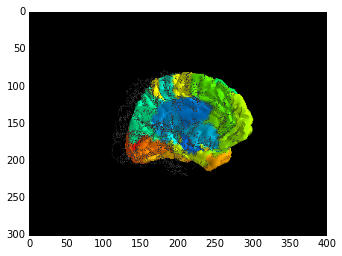

In [9]:
try:
    from tvb.simulator.plot.tools import mlab
    (surf_mesh, bpts) = surface_parcellation(CORTEX_BOUNDARIES, colouring, mapping_colours, colour_rgb, interaction=True)
    imshow(mlab.screenshot())
except ImportError:
    LOG.exception("Could not display!")
    pass